In [2]:
# Experiment 1: 3-qubit Entanglement

In [43]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## for display
from IPython.display import display

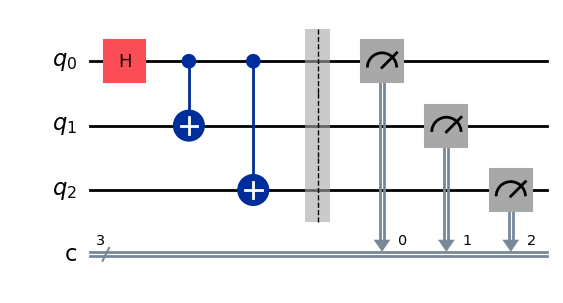

In [17]:
# Use Aer's qasm_simulator
simulator = AerSimulator()

# Create a Quantum Circuit 
qc = QuantumCircuit(3,3)

# Add a H gate on qubit 0
qc.h(0)

# apply a CNOT gate on qubit 0 (Control) and qubit 1 (Target)
qc.cx(0,1)
qc.cx(0,2)

qc.barrier()
# Map the quantum measurement to the classical bits
qc.measure([0,1,2],[0,1,2])

# Draw the circuit
display(qc.draw())


Total counts: {'111': 5053, '000': 4947}


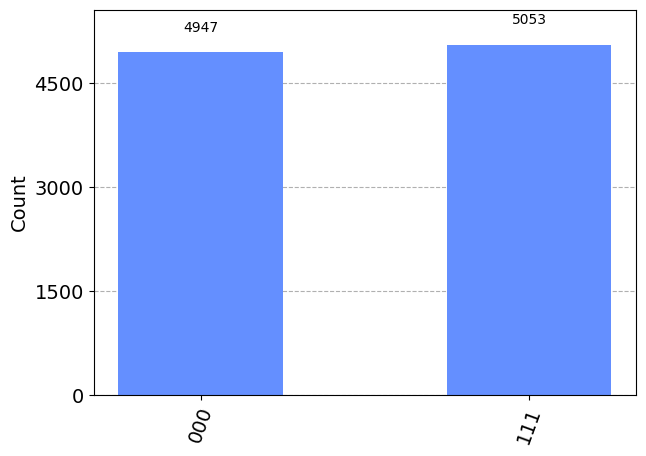

In [9]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts:",counts)

plot_histogram(counts)

In [10]:
# the cnot gates creates an entanglement such that when one is measured, others are decided

In [11]:
#Experiment 2: 4-qubit Entanglement

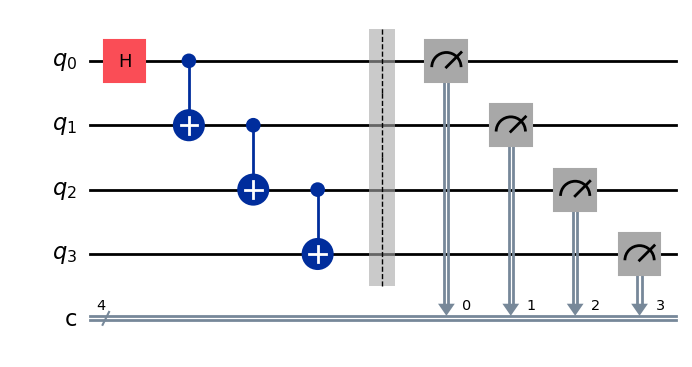

In [19]:

simulator = AerSimulator()

# Create a Quantum Circuit 
qc = QuantumCircuit(4,4)

# Add a H gate on qubit 0
qc.h(0)

# apply a CNOT gate on qubit 0 (Control) and qubit 1 (Target)
qc.cx(0,1)
qc.cx(1,2)
qc.cx(2,3)

qc.barrier()
# Map the quantum measurement to the classical bits
qc.measure([0,1,2,3],[0,1,2,3])

# Draw the circuit
display(qc.draw())


Total counts: {'1111': 4991, '0000': 5009}


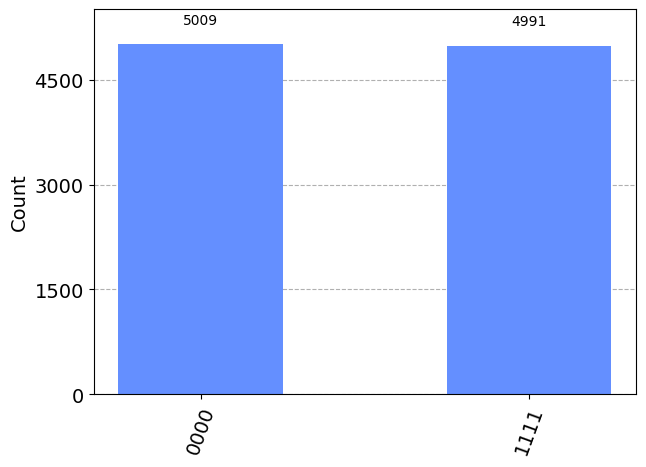

In [20]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts:",counts)

plot_histogram(counts)

In [21]:
# the cnot gates creates an entanglement such that when one is measured, others are decided

In [22]:
#Experiment 3: Toffoli gate

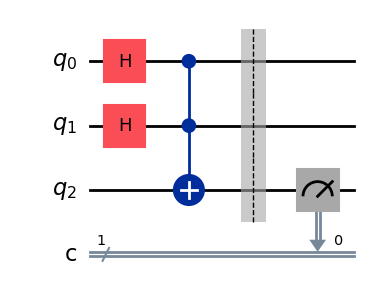

In [26]:
# Use Aer's qasm_simulator
simulator = AerSimulator()

# Create a Quantum Circuit 
qc = QuantumCircuit(3,1)

# Add a H gate on qubit 0
qc.h(0)
qc.h(1)
# apply a CNOT gate on qubit 0 (Control) and qubit 1 (Target)
qc.ccx(0,1,2)

qc.barrier()
# Map the quantum measurement to the classical bits
qc.measure([2],[0])

# Draw the circuit
display(qc.draw())


Total counts: {'1': 2478, '0': 7522}


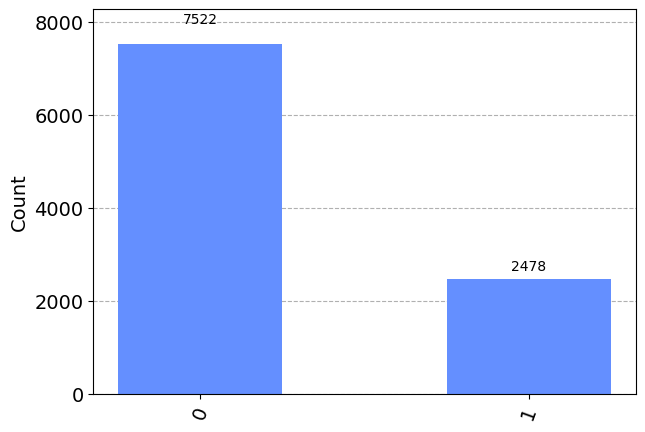

In [27]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts:",counts)

plot_histogram(counts)

In [28]:
# for q1q0 to be 11 is 25%, so the results are well copmpiled

In [29]:
#Experiment 4: Implementing AND and NAND gates

AND with inputs 0 0 gives output 0


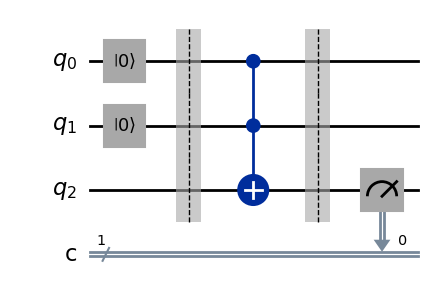



AND with inputs 0 1 gives output 0


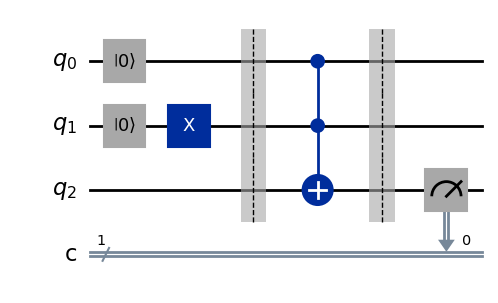



AND with inputs 1 0 gives output 0


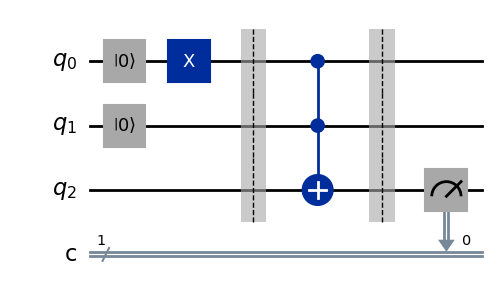



AND with inputs 1 1 gives output 1


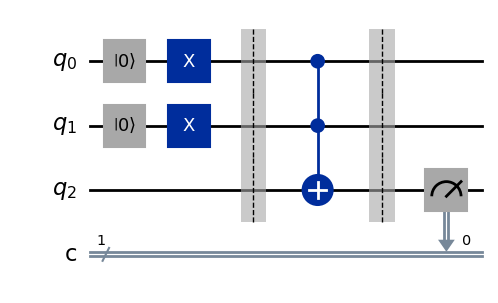

In [30]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output AND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # this is where your program for quantum AND gate goes
    qc.ccx(0,1,2)

    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = AerSimulator()
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')



NAND with inputs 0 0 gives output 1


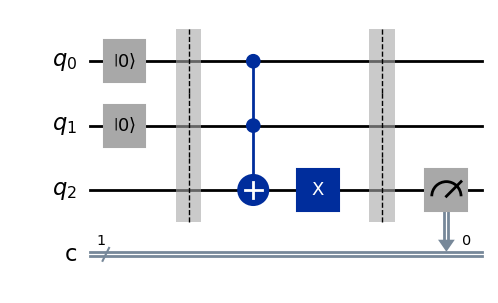



NAND with inputs 0 1 gives output 1


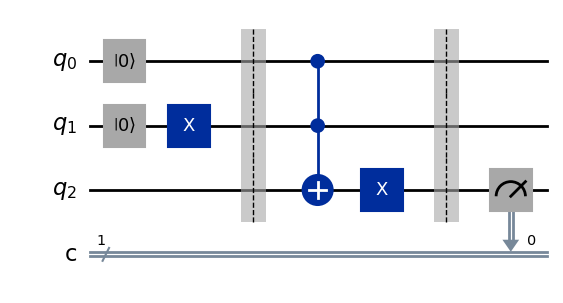



NAND with inputs 1 0 gives output 1


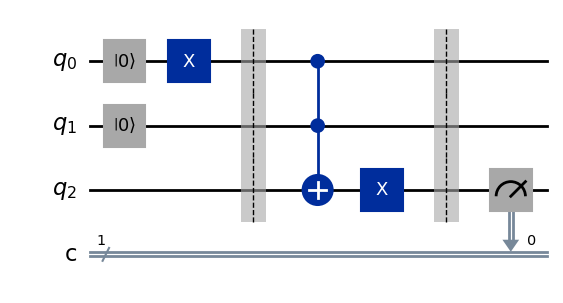



NAND with inputs 1 1 gives output 0


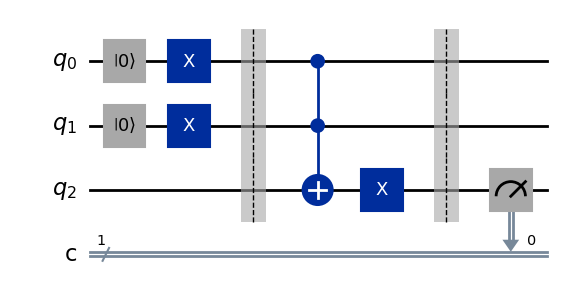

In [32]:
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # this is where your program for quantum AND gate goes
    qc.ccx(0,1,2)
    qc.x(2)
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = AerSimulator()
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('NAND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

In [33]:
#Experiment 5: Implementation of the OR gate

OR with inputs 0 0 gives output 0


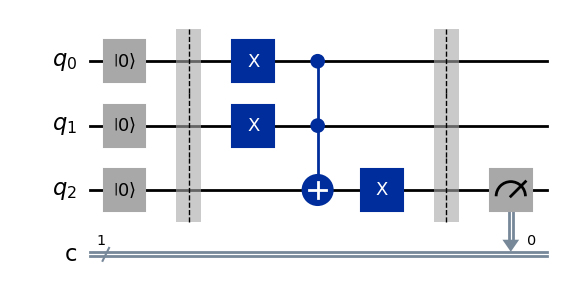



OR with inputs 0 1 gives output 1


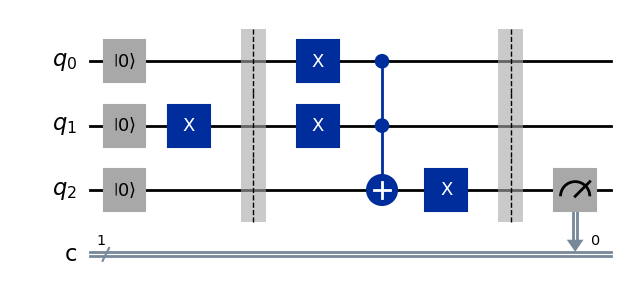



OR with inputs 1 0 gives output 1


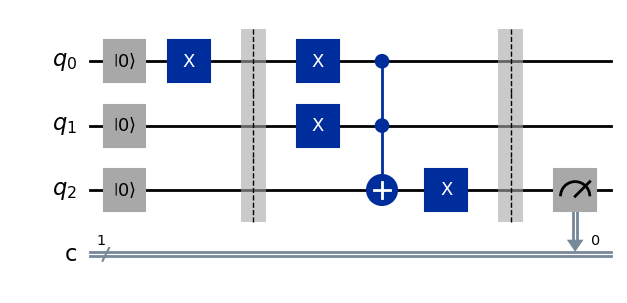



OR with inputs 1 1 gives output 1


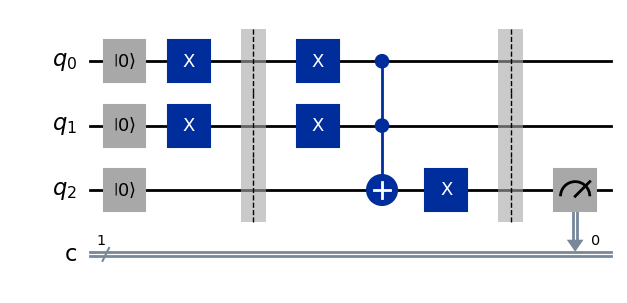

In [34]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # this is where your program for quantum OR gate goes
    qc.x(0)
    qc.x(1)
    qc.ccx(0,1,2)
    qc.x(2)
    
    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = AerSimulator()
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output## Test the function

for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')


OR with inputs 0 0 gives output 0


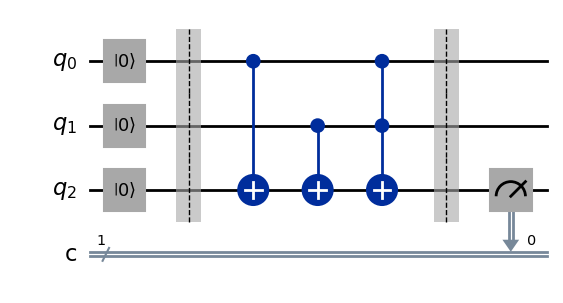



OR with inputs 0 1 gives output 1


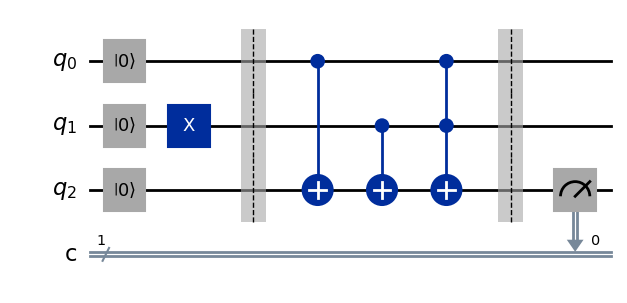



OR with inputs 1 0 gives output 1


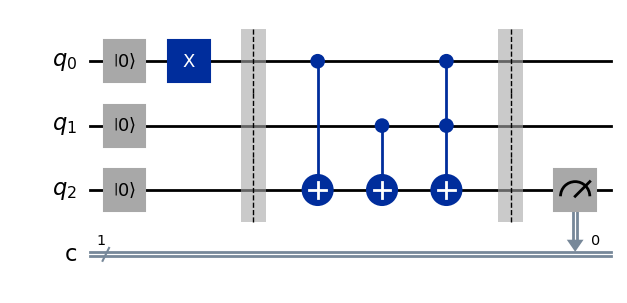



OR with inputs 1 1 gives output 1


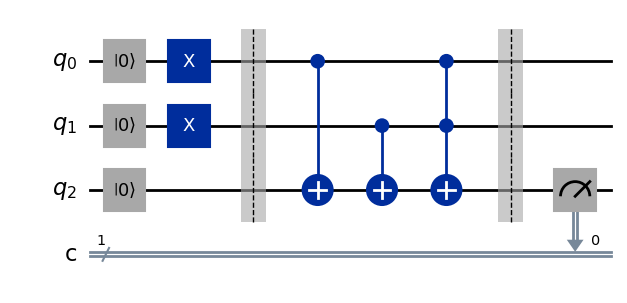

In [35]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # this is where your program for quantum OR gate goes
    qc.cx(0,2)
    qc.cx(1,2)
    qc.ccx(0,1,2)
    
    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = AerSimulator()
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output## Test the function

for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

In [36]:
#x(xor)y + flip when x(and)y

In [37]:
#Experiment 6: Application of CNOT gates

UNKNOWN func with inputs 0 0 gives outputs 0 0


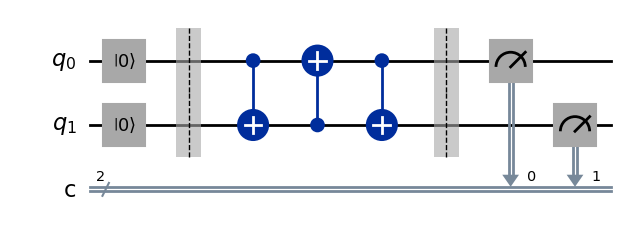



UNKNOWN func with inputs 0 1 gives outputs 1 0


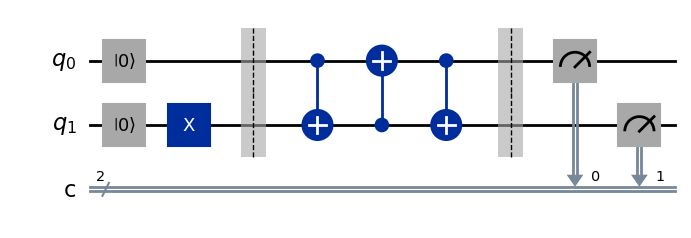



UNKNOWN func with inputs 1 0 gives outputs 0 1


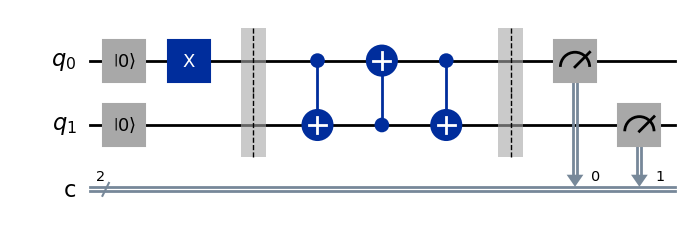



UNKNOWN func with inputs 1 1 gives outputs 1 1


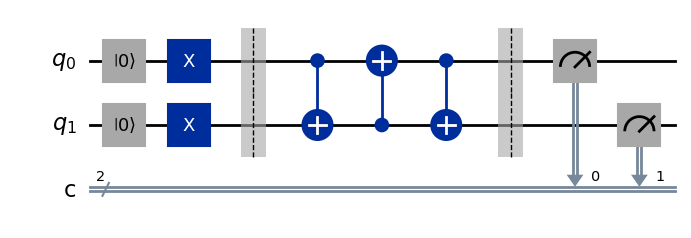

In [38]:
def UNKNOWN(inp1,inp2):
    """An unknown function 
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output the circuit.
        str: Output values measured from qubit 0 and qubit 1.
    """
  
    qc = QuantumCircuit(2, 2) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # add the code based on the circuit diagram in the handout
    qc.cx(0,1)
    qc.cx(1,0)
    qc.cx(0,1)

    
    
    # barrier between gate operation and measurement 
    qc.barrier()
    
    qc.measure([0,1],[0,1]) # output from qubit 0 and qubit 1 are measured
  
    #We'll run the program on a simulator
    backend = AerSimulator()
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    out = job.result().get_memory()[0]
  
    return qc, out

## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, out = UNKNOWN(inp1, inp2)
        # the output string bit positions are reversed
        print('UNKNOWN func with inputs',inp1,inp2,'gives outputs',out[1],out[0])
        display(qc.draw())
        print('\n')


In [40]:
# the unknown function is f(x,y) = (y,x)

In [41]:
#Experiment 7: Application of one CNOT and four H gates

UNKNOWN func with inputs 0 0 gives outputs 0 0


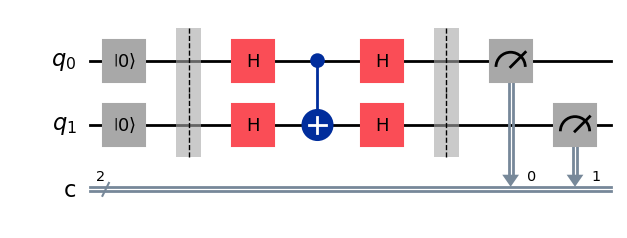



UNKNOWN func with inputs 0 1 gives outputs 1 1


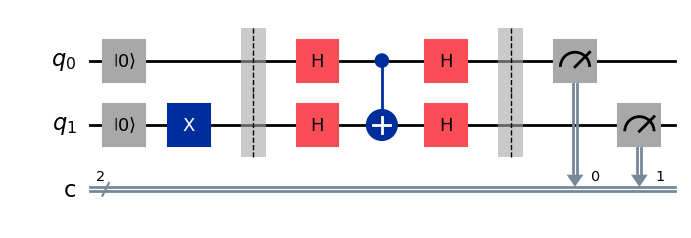



UNKNOWN func with inputs 1 0 gives outputs 1 0


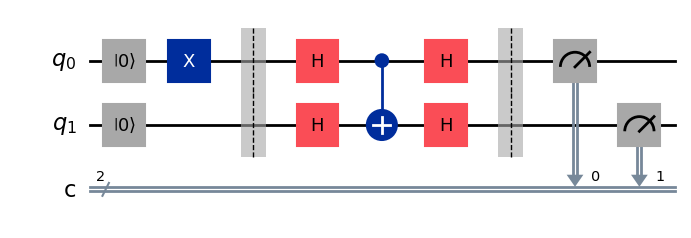



UNKNOWN func with inputs 1 1 gives outputs 0 1


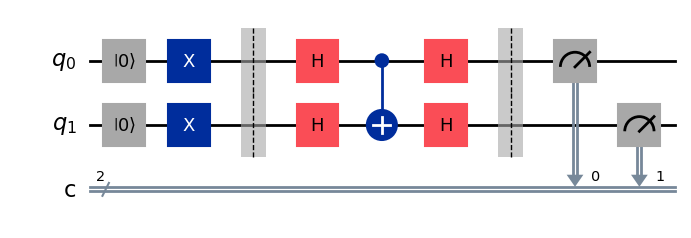

In [44]:
def UNKNOWN(inp1,inp2):
    """An unknown function 
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output the circuit.
        str: Output values measured from qubit 0 and qubit 1.
    """
  
    qc = QuantumCircuit(2, 2) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # add the code based on the circuit diagram in the handout

    qc.h(0)
    qc.h(1)
    qc.cx(0,1)
    qc.h(0)
    qc.h(1)
    
    
    # barrier between gate operation and measurement 
    qc.barrier()
    
    qc.measure([0,1],[0,1]) # output from qubit 0 and qubit 1 are measured
  
    #We'll run the program on a simulator
    backend = AerSimulator()
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    out = job.result().get_memory()[0]
  
    return qc, out

## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, out = UNKNOWN(inp1, inp2)
        # the output string bit positions are reversed
        print('UNKNOWN func with inputs',inp1,inp2,'gives outputs',out[1],out[0])
        display(qc.draw())
        print('\n')


In [45]:
#the unknown function is f(x,y) = (x(xor)y,y)